## 20 Sept 2019

<strong>RULES</strong><br>
<strong>Date:</strong> Level 2 heading ## <br>
<strong>Example Heading:</strong> Level 3 heading ###<br>
<strong>Method Heading:</strong> Level 4 heading ####

### References

1. [Forester_W._Isen;_J._Moura]_DSP_for_MATLAB_and_La Volume II(z-lib.org)
2. H. K. Dass, Advanced Engineering Mathematics
3. [Forester_W._Isen;_J._Moura]_DSP_for_MATLAB_and_La Volume I(z-lib.org)
4. [John_G_Proakis;_Dimitris_G_Manolakis]_Digital_Sig(z-lib.org)

### Imports

In [42]:
import numpy as np
from sympy import oo
import math
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from IPython.display import display_latex
from sympy import latex
import math
from scipy import signal
from datetime import datetime
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

### Setup

In [43]:
sp.init_printing(use_latex = True)
    
z, f, i = sp.symbols('z f i')
x, k = sp.symbols('x k')

### Methods

In [44]:
# Usage: display_equation('u_x', x)
def display_equation(idx, symObj):
    if(isinstance(idx, str)):
        eqn = '\\[' + idx + ' = ' + latex(symObj) + '\\]'
        display_latex(eqn, raw=True)
    else:
        eqn = '\\[' + latex(idx) + ' = ' + latex(symObj) + '\\]'
        display_latex(eqn, raw=True)
    return

In [45]:
# Usage: display_full_latex('u_x')
def display_full_latex(idx):
    if(isinstance(idx, str)):
        eqn = '\\[' + idx + '\\]'
        display_latex(eqn, raw=True)
    else:
        eqn = '\\[' + latex(idx) + '\\]'
        display_latex(eqn, raw=True)
    return

In [46]:
# Usage: display_full_latex('u_x')
def display_full_latex(idx):
    if(isinstance(idx, str)):
        eqn = '\\[' + idx + '\\]'
        display_latex(eqn, raw=True)
    else:
        eqn = '\\[' + latex(idx) + '\\]'
        display_latex(eqn, raw=True)
    return

In [47]:
def ztrans(a, b):
    F = sp.summation(f/z**k, ( k, a, b ))
    return F

In [48]:
def display_ztrans(f, k, limits = (-4, 4)):
    F = sp.summation(f/z**k, ( k, -oo, oo ))
    display_equation('f(k)', f)
    display_equation('F(k)_{\infty}', F)

    F = sp.summation(f/z**k, (k, limits[0], limits[1]))
    display_equation('F(k)_{'+ str(limits[0]) + ',' + str(limits[1]) + '}', F)
    return

In [49]:
def sum_of_GP(a, r):
    return sp.simplify(a/(1-r))

In [50]:
#a = Denominator [2, 1, 1] -> 2z^2 + z + 1
#b = Numerator [1, 0, 3] -> z^2 + 3

# Credit: https://www.dsprelated.com/showcode/244.php
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='b', markerfacecolor='b')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

### Z Transform

In [51]:
display_full_latex('X(z) = \sum_{-\infty}^{\infty} x[n]z^{-n}')

### Tests

#### Convert Symbolic to Numeric

In [52]:
f = x**2
f = sp.lambdify(x, f, 'numpy')
f(2)

In [53]:
display_equation('f(x)', sp.summation(3**k, ( k, -oo, oo )))

In [54]:
display_equation('F(z)', sp.summation(3**k/z**k, ( k, -oo, oo )))

#### Partial Fractions

In [55]:
f = 1/(x**2 + x - 6)
display_equation('f(x)', f)
f = sp.apart(f)
display_equation('f(x)_{canonical}', f)

#### Piecewise

In [56]:
f1 = 5**k
f2 = 3**k
f = sp.Piecewise((f1, k < 0), (f2, k >= 0))
display_equation('f(k)', f)

## 21 Sept 2019

#### Positive Time / Causal

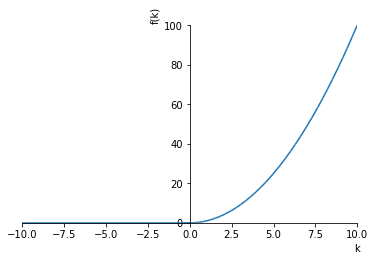

In [57]:
f1 = k **2
f2 = 3**k
f = f1 * sp.Heaviside(k)
# or
#f = sp.Piecewise((0, k < 0), (f1, k >= 0))
display_equation('f(k)', f)
sp.plot(f, (k, -10, 10))

#### Stem Plot

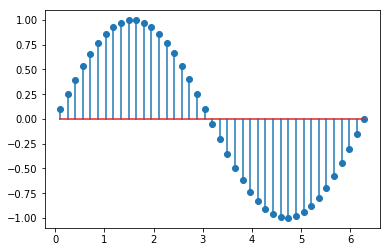

In [58]:
x = np.linspace(0.1, 2 * np.pi, 41)
y = np.sin(x)

plt.stem(x, y)
plt.show()

#### zplane Plot

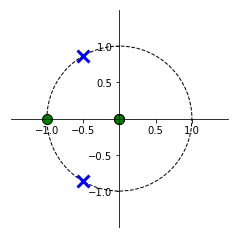

(array([-1.,  0.,  0.]), array([-0.5+0.8660254j, -0.5-0.8660254j]), 1.0)

In [59]:
b = np.array([1, 1, 0, 0])
a = np.array([1, 1, 1])
zplane(b,a)

### Filter

In [60]:
g = (1 + z**-2)/(1-1.2*z**-1+0.81*z**-2)
display_equation('F(z)', g)
b = np.array([1,1])
a = np.array([1,-1.2,0.81])
x = np.ones((1, 8))
# Response
y = signal.lfilter(b, a, x)
# Reverse
signal.lfilter(a, b, y)

array([[1., 1., 1., 1., 1., 1., 1., 1.]])

### [1] Example 2.2

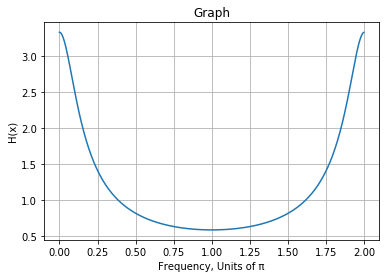

In [61]:
radFreq = np.arange(0, 2*np.pi, 2*np.pi/499)
g = np.exp(1j*radFreq)
Zxform= 1/(1-0.7*g**(-1))

plt.plot(radFreq/np.pi,abs(Zxform))
plt.title('Graph')
plt.xlabel('Frequency, Units of π')
plt.ylabel('H(x)')
plt.grid(True)
plt.show()

### [2] Chapter 19, Example 5

In [62]:
f = 3**(-k)
display_ztrans(f, k, (-4, 3))

### [2] Example 9

In [63]:
f1 = 5**k
f2 = 3**k
f = sp.Piecewise((f1, k < 0), (f2, k >= 0))
display_ztrans(f, k, (-3, 3))

In [64]:
p = sum_of_GP(z/5, z/5)
q = sum_of_GP(1, 3/z)
display_equation('F(z)', sp.ratsimp(q + p))

## 28 Sept, 2019

### [3] Folding formula

fperceived = [ f - fsampling * NINT( f / fsampling ) ]

## 9 Oct, 2019

### [3] Section 4.3

### Equations

In [65]:
display_full_latex('F \\rightarrow analog')
display_full_latex('f \\rightarrow discrete')
display_full_latex('Nyquist frequency = F_s')
display_full_latex('Folding frequency = \\frac{F_s}{2}')
display_full_latex('F_{max} = \\frac{F_s}{2}')
display_full_latex('T = \\frac{1}{F_s}')
display_full_latex('f = \\frac{F}{F_s}')
display_full_latex('f_k = \\frac{k}{N}')
display_full_latex('F_k = F_0 + kF_s, k = \\pm 1, \\pm 2, ...')
display_full_latex('x_a(t) = Asin(2\\pi Ft + \\theta)')
display_full_latex('x(n) = Asin(\\frac{2\\pi nk}{N} + \\theta)')
display_full_latex('x(n) = Asin(2\\pi fn + \\theta)')
display_full_latex('x(n) = x_a (nT) = Acos(2\\pi \\frac{F_0 + kF_s}{F_s} n + \\theta)')
display_full_latex('t = nT')
display_full_latex('\\Omega = 2\\pi F')
display_full_latex('\\omega = 2\\pi f')
display_full_latex('\\omega = \\Omega T')
display_full_latex('x_q(n) = Q[x(n)]')
display_full_latex('e_q(n) = x_q(n) - x(n)')
display_full_latex('Interpolation function, g(t) = \\frac{sin2\\pi Bt}{2\\pi Bt}')
display_full_latex('x_a(t) = \\sum^\\infty _{n = - \\infty} x_a(\\frac{n}{F_s}).g(t - \\frac{n}{F_s})')
display_full_latex('\\Delta = \\frac{x_{max} - x_{min}}{L-1}, where L = Number of quantization levels')
display_full_latex('-\\frac{\\Delta}{2} \\leq e_q(n) \\leq \\frac{\\Delta}{2}')
display_full_latex('b \\geq log_2 L')
display_full_latex('SQNR = \\frac{3}{2}.2^{2b}')
display_full_latex('SQNR(dB) = 10log_{10}SQNR = 1.76 + 6.02b')

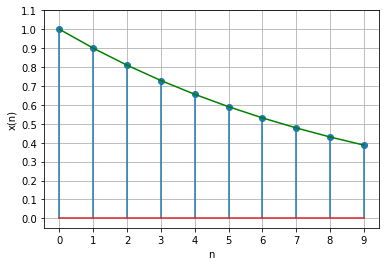

In [66]:
x = np.arange(0, 10, 1)
y = np.power(0.9, x) * np.heaviside(np.power(0.9, x), 1)

display_full_latex('x_a(t) = 0.9^t')
display_full_latex('x(n) = 0.9^n')

plt.stem(x, y)
plt.plot(x, y, 'g-')
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 1.2, 0.1))
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid(True)
plt.show()

## 14 Oct, 2019

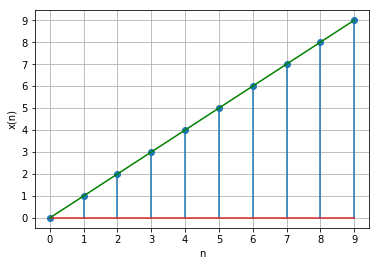

In [67]:
n = sp.symbols('n')

x = np.arange(0, 10, 1)
y = x * np.heaviside(x, 1)

f = sp.Piecewise((0, n < 0), (n, n >= 0))
display_equation('u_r(n)', f)

plt.stem(x, y)
plt.plot(x, y, 'g-')
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 10, 1))
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid(True)
plt.show()

In [68]:
display_full_latex('E = \\sum^\\infty _{n = -\\infty} x|(n)|^2')
display_full_latex('P = \\lim_{N \\rightarrow \\infty} \\frac{1}{2N + 1} \\sum^ N _{n = -N} x|(n)|^2')

## 16 Oct, 2019

#### General form of the input-output relationships

In [69]:
display_full_latex('y(n) = -\\sum^N _{k = 1}a_k y(n-k) + \\sum^M _{k = 0}b_k x(n-k)')

### [4] Example 3.2

[ 1  4  8  8  3 -2 -1]


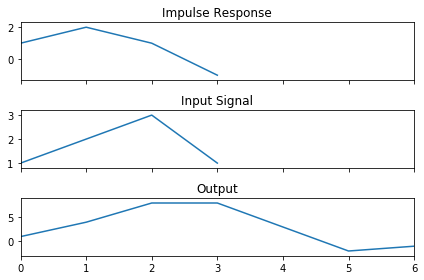

In [70]:
h = np.array([1, 2, 1, -1])
x = np.array([1, 2, 3, 1])
y = np.convolve(h, x, mode='full')
#y = signal.convolve(h, x, mode='full', method='auto')
print(y)

fig, (ax_orig, ax_h, ax_x) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(h)
ax_orig.set_title('Impulse Response')
ax_orig.margins(0, 0.1)
ax_h.plot(x)
ax_h.set_title('Input Signal')
ax_h.margins(0, 0.1)
ax_x.plot(y)
ax_x.set_title('Output')
ax_x.margins(0, 0.1)
fig.tight_layout()
fig.show()

## 17 Oct, 2019

### Sum of an AP with common ratio r and first term a, starting from the zeroth term

In [71]:
a, r = sp.symbols('a r')

s = sp.summation(a*r**k, ( k, 0, n ))
display_equation('S_n', s)

### Sum of positive powers of a

In [72]:
a = sp.symbols('a')

s = sp.summation(a**k, ( k, 0, n ))
display_equation('S_n', s)

### [3] 4.12.3 Single Pole IIR

<StemContainer object of 3 artists>

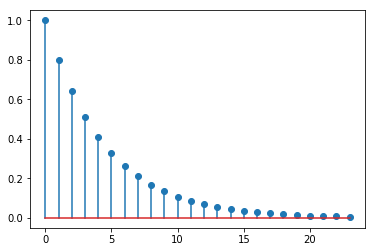

In [73]:
SR = 24
b = 1
p = 0.8
y = np.zeros((1, SR)).ravel()
x = np.zeros((1, SR + 1)).ravel()
x[0] = 1
y[0] = b * x[0]

for n in range(1, SR):
    y[n] = b * x[n] + p * y[n - 1]
    
plt.stem(y)

### Copying the method above for [4] 4.1 Averaging

In [74]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y[0] = b * x[0]

for n in range(1, len(x)):
    y[n] = (n/(n + 1)) * y[n - 1] + (1/(n + 1)) * x[n]
    
print(y[n], '\n')

5.5 



### My Recursive Averaging Implementation

In [75]:
def avg(x, n):
    if (n < 0):
        return 0
    else:
        return (n/(n + 1)) * avg(x, n - 1) + (1/(n + 1)) * x[n]

In [76]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
average = avg(x, len(x) - 1)
print(average)

5.5


### Performance Comparism

In [77]:
from timeit import timeit

code_rec = '''
import numpy as np

def avg(x, n):
    if (n < 0):
        return 0
    else:
        return (n/(n + 1)) * avg(x, n - 1) + (1/(n + 1)) * x[n]
        
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
average = avg(x, len(x) - 1)
'''

code_py = '''
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
average = sum(x, len(x) - 1) / len(x)
'''

code_loop = '''
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
sum = 0

for i in x:
    sum += i
    
average = sum/len(x)
'''

running_time_rec = timeit(code_rec, number = 100) / 100
running_time_py = timeit(code_py, number = 100) / 100
running_time_loop = timeit(code_loop, number = 100) / 100

print("Running time using my recursive average function: \n",running_time_rec, '\n')
print("Running time using python sum function: \n",running_time_py)
print("Running time using loop python function: \n",running_time_loop)

Running time using my recursive average function: 
 0.00019250600000020768 

Running time using python sum function: 
 6.519000000366759e-06
Running time using loop python function: 
 8.873000000448883e-06


### [4] Example 4.1

In [78]:
def rec_sqrt(x, n):
    if (n == -1):
        return 1
    else:
        return (1/2) * (rec_sqrt(x, n - 1) + (x[n]/rec_sqrt(x, n - 1)))

In [79]:
A = 2
x = np.ones((1, 5)).ravel() * A
print(rec_sqrt(x, len(x) - 1))

1.414213562373095


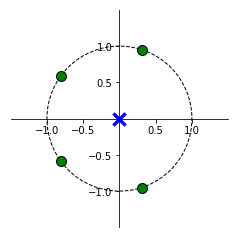

(array([ 0.30901699+0.95105652j,  0.30901699-0.95105652j,
        -0.80901699+0.58778525j, -0.80901699-0.58778525j]),
 array([0., 0.]),
 1.0)

In [80]:
b = np.array([1, 1, 1, 1, 1])
a = np.array([1, 0, 0])
zplane(b,a)